<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>

<p><font size="5" color='grey'> <b>
Pandas Basics
</b></font> </br></p>



---

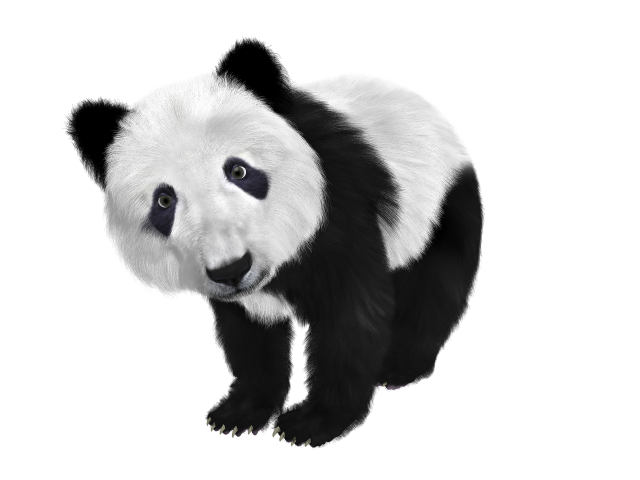

Bild von <a href="https://pixabay.com/de/users/sipa-62896/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=659186">Silvia</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=659186">Pixabay</a>
  

# Import der Daten
---

In [ ]:
import pandas as pd
import plotly.express as px
df = px.data.tips()

# Daten anzeigen

df.head(): Zeigt die ersten fünf Zeilen der Beispieldaten an

In [ ]:
df.head()

df.style.format(): Formatierung der Ausgabe der numerischen Spalten

In [ ]:
df.head(10).style.format("{:,.0f}", subset=['total_bill','tip'])

df.tail(): Zeigt die letzten fünf Zeilen der Beispieldaten an

In [ ]:
df.tail()

df.sample(n): Zeigt die zufällige Anzahl n Zeilen in den Beispieldaten an

In [ ]:
df.sample(10)

df.shape: Zeigt die Zeilen und Spalten (Dimensionen) der Beispieldaten an.

In [ ]:
df.shape

df.columns: Zeige die Spaltennamen

In [ ]:
df.columns

df.dtypes: Zeige die Datentypen

In [ ]:
df.dtypes

df.ndim: Zeige die Dimensionen

In [ ]:
df.ndim

# Statistiken

df.describe(): Ruft die Grundstatistik jeder Spalte der Beispieldaten ab

In [ ]:
df.describe().T

In [ ]:
df.describe(include=object).T

df.info(): Informationen über die verschiedenen verwendeten Datentypen und die Nicht-Null-Anzahl jeder Spalte abrufen.

In [ ]:
df.info()

df.corr(): Dies kann Ihnen die Korrelationsmatrix zwischen allen ganzzahligen Spalten im Datenrahmen liefern.

In [ ]:
df.corr(numeric_only=True)

In [ ]:
df.corr(method='spearman', numeric_only=True)

In [ ]:
df.corrwith(df['total_bill'], numeric_only=True)

df.mean(): Berechnet den Mittelwert je Spalte

In [ ]:
df.mean()

df.var(): Varianz - quadrierte Abweichung der Datenpunkte in einem Datensatz um den Mittelwert

In [ ]:
df.var(numeric_only=True)

df.std(): Standardabweichung - zeigt, wie weit die Werte im Durchschnitt vom Mittelwert (Durchschnitt) des Datensatzes abweichen

In [ ]:
df.std(numeric_only=True)

df.memory_usage(): Zeigt an, wie viel Speicher von jeder Spalte verbraucht wird.

In [ ]:
df.memory_usage()

df.count(): Anzahl der Werte je Spalte

In [ ]:
df.count()

df.value_counts(): Berechnet Anzahl von Merkmalsausprägungen

In [ ]:
df.sex.value_counts()

# Daten kopieren, einfügen, löschen

In [ ]:
data = df.copy()
data.shape

In [ ]:
data.insert(7, "target_new", df.smoker)

In [ ]:
data.pop('target_new')

In [ ]:
data.drop(['smoker'], axis=1, inplace=True)

# Daten suchen & ersetzen

In [ ]:
data['time'].replace(['Dinner', 'Lunch'], ['Abendessen', 'Mittagessen'], inplace = True)

# Daten bereinigen

Diese Funktionen werden verwendet, um die fehlenden Daten zu verarbeiten. Einige Zeilen in den Daten enthalten einige Null- und Müllwerte, die die Leistung unseres trainierten Modells beeinträchtigen können. Daher ist es immer besser, diese fehlenden Werte zu korrigieren oder zu entfernen.
+ df.isnull(): Dadurch werden die fehlenden Werte in Ihrem Datenrahmen identifiziert.
+ df.dropna(): Dadurch werden die Zeilen entfernt, die fehlende Werte in jeder Spalte enthalten.
+ df.fillna(val): Dadurch werden die fehlenden Werte mit dem im Argument angegebenen Wert gefüllt.
+ df[‘col’].astype(new_data_type): Es kann den Datentyp der ausgewählten Spalten in einen anderen Datentyp konvertieren.

Funktion zur Generierung fehlender Werte: 20% der Daten werden auf NaN gesetzt.

In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  Generierung fehlende Werte</font> </br></p>
def missing_data(df):
    import numpy as np
    # Erstellung einer Kopie des DataFrame zur Demonstration
    df_missing = df.copy()
    # Zufälliges Setzen von Werten auf fehlend (NaN)
    # Wir wählen hier eine Rate von 10% der Daten als fehlend
    missing_rate = 0.2
    # Für jede Spalte im DataFrame
    for col in df_missing.columns:
        # Zufällige Auswahl der Indizes für fehlende Werte
        missing_indices = np.random.choice(df_missing.index, int(len(df_missing) * missing_rate), replace=False)
        # Setzen der ausgewählten Werte auf NaN
        df_missing.loc[missing_indices, col] = np.nan
    return df_missing

In [ ]:
# Identifizierung von fehlenden Werten
df1 = missing_data(df)
isnull_example = df1.isnull()
isnull_example.head()

In [ ]:
# Entfernen von Zeilen mit fehlenden Werten
df1 = missing_data(df)
print(f"Vorher: {df1.shape}")
df1.dropna(inplace=True)
print(f"Nachher: {df1.shape}")

In [ ]:
# Füllen von fehlenden Werten mit einem bestimmten Wert (hier als Beispiel 0)
df1 = missing_data(df)
print(df1.head())
df1.fillna(0, inplace=True)
print(df1.head())

In [ ]:
# Füllen von fehlenden Werten mit unterschiedlichen Wert je Spalte
df1 = missing_data(df)
print(df1.head())
values = {"tip": 0, "sex": "open", "smoker": "open", "day": "open", "time": "open", "size": 0}
df1.fillna(value=values, inplace=True)
print(df1.head())

# Daten konvertieren

In [ ]:
# Konvertierung des Datentyps einer Spalte (hier konvertieren wir 'tip' von float zu string)
df1 = df.copy()
df1['tip'] = df1['tip'].astype(str)
df1.info()

In [ ]:
# Konvertieren in Strings
df.to_string

In [ ]:
# Konvertieren in ein Dictionary
df_d = df.to_dict()
df_d.keys()

In [ ]:
# Konvertieren in json Format
df.to_json(orient='columns')

# Daten Dimension ändern

In [ ]:
data_np = df.values                   # Return a Numpy representation of the DataFrame.
data_np2 = data_np.reshape(-1,1)        # Matrixelemte werden in n-Zeilen und m-Spalten neu strukturiert, hier nur n Zeilen und 1 Spalte
data_np2

# Daten Spalten umbenennen

In [ ]:
df.rename(columns = {"total_bill": "bill"}, inplace=True)

# Daten analysieren

Hier verwenden wir einige hilfreiche Funktionen bei der Datenanalyse, wie Gruppieren, Sortieren und Filtern.

Aggregationen: Sie können eine Spalte nach ihrem Namen gruppieren und dann einige Aggregationsfunktionen wie Summe, Min/Max, Mittelwert usw. anwenden.

In [ ]:
df.groupby("time").agg({"tip": "sum"})

Wenn Sie mehrere Aggregationen gleichzeitig anwenden möchten, können Sie sie so schreiben.

In [ ]:
df.agg({"bill": "sum", "tip": "mean"})

Filtern: Wir können die Daten zeilenweise nach einem bestimmten Wert oder einer Bedingung filtern.

In [ ]:
df[df["bill"] > 40]

Sie können den Datenrahmen auch mit der Funktion query() filtern. Es wird auch eine ähnliche Ausgabe wie oben generiert.

In [ ]:
df.query('tip > 2')

Sie können die Daten nach einer bestimmten Spalte entweder in aufsteigender oder absteigender Reihenfolge sortieren.

In [ ]:
df.sort_values("bill", ascending=True)

# Daten kombinieren

Wir können mehrere Datenrahmen entweder horizontal oder vertikal kombinieren und zusammenführen. Es werden zwei Datenrahmen verkettet und ein einzelner zusammengeführter Datenrahmen zurückgegeben.

In [ ]:
# Erstellen Dummy-Daten
df1 = df.copy()
df2 = df.copy()

Vertikal verketten - Zeilen hinzufügen

In [ ]:
combined_df = pd.concat([df1, df2])
df1.shape, df2.shape, combined_df.shape

Horizontal verketten - Spalten hinzufügen

Spalte hinzufügen

In [ ]:
df1['_new_'] = 999
df1

Mischen von 2 Tabellen

In Pandas bieten sowohl merge() als auch join() Funktionen zur Kombination von DataFrames an, aber es gibt einige Unterschiede in ihrer Verwendung und Funktionalität. Zusammenfassend ist merge() leistungsfähiger und flexibler, besonders wenn komplexe Verknüpfungen notwendig sind oder wenn man nicht auf die Indexe der DataFrames verknüpfen möchte. join() ist hingegen einfacher und bequemer für schnelle Verknüpfungen basierend auf Indexen.

Methode der Verknüpfung:

+ merge(): Unterstützt alle Standard SQL-Joins wie 'left', 'right', 'outer', und 'inner'.
+ join(): Erlaubt auch 'left', 'right', 'outer', und 'inner' Joins, aber sie sind standardmäßig auf 'left' Joins eingestellt.

In [ ]:
# Erstellen wir zwei DataFrames aus dem 'tips' DataFrame für die Demonstration, es werden nur die ersten 5 Zeilen übernommen
# merge() akzeptiert Überschneidungen bei den Spaltennamen
df1 = df[['bill', 'tip', 'sex']].head()
df2 = df[['sex', 'smoker', 'day']].head()

In [ ]:
# merge()
merged_df = pd.merge(df1, df2, left_index=True, right_index=True)
merged_df

In [ ]:
# Erstellen wir zwei DataFrames aus dem 'tips' DataFrame für die Demonstration, es werden nur die ersten 5 Zeilen übernommen
# joint() akzeptiert KEINE Überschneidungen bei den Spaltennamen
df1 = df[['bill', 'tip']].head()
df2 = df[['sex', 'smoker', 'day']].head()

In [ ]:
# join() Beispiel
joined_df = df1.join(df2)
joined_df

# Daten sortieren

In [ ]:
df.sort_values(by=['bill'], ascending=False, inplace=False)

# Daten selektieren

df.iloc[row_num]: Es wählt eine bestimmte Zeile basierend auf ihrem Index aus

In [ ]:
df.iloc[13]

df[col_name]: Es wird die bestimmte Spalte ausgewählt

In [ ]:
df['tip']

df[[‚col1‘, ‚col2‘]]: Es werden mehrere angegebene Spalten ausgewählt

In [ ]:
df[['tip', 'time']]

df.col[(df['col'] == 'value') & (df['col'] >= value)]   
Es werden mehrere Zeilen und Spalten abhängig von Bedingungen ausgewählt

In [ ]:
df.day[(df['sex'] == 'Female') & (df['tip'] >= 3.0)].head()


df.query(): Daten selektieren

In [ ]:
df.query('total_bill == 16.99')

# Funktionen anwenden

Anwenden benutzerdefinierter Funktionen Sie können benutzerdefinierte Funktionen entsprechend Ihren Anforderungen entweder in einer Zeile oder einer Spalte anwenden.

In [ ]:
def steuern(x):
    return x * 0.19

df["tax"] = df["bill"].apply(steuern)
df

# Zeitreihenanalysen

In der Mathematik bedeutet Zeitreihenanalyse die Analyse der in einem bestimmten Zeitintervall gesammelten Daten, und Pandas verfügen über Funktionen zur Durchführung dieser Art von Analyse.


Pandas, eine leistungsstarke Bibliothek in Python, bietet eine Vielzahl von Funktionen und Methoden zur Analyse und Manipulation von Daten, insbesondere für Zeitreihen. Hier sind einige der Standardmethoden und Funktionalitäten, die Pandas für die Datenanalyse, einschließlich Zeitreihenanalysen, bereitstellt:

**Zeitbasierte Indizierung:**

Ermöglicht das bequeme Arbeiten mit Zeitreihendaten, indem Datums- und Zeitindizes genutzt werden.


**Datumsbereichserstellung:**

Funktionen wie pd.date_range() zum Erstellen von Datumsbereichen, was für Zeitreihenanalysen nützlich ist.


**Resampling:**

Methoden wie resample() zum Ändern der Frequenz von Zeitreihendaten, z.B. von täglich zu monatlich.


**Zeitliche Verschiebungen:**

Funktionen wie shift() und tshift() zum Verschieben von Daten in der Zeit.


**Rolling-Statistiken:**

Methoden wie rolling() bieten die Möglichkeit, gleitende Fensterstatistiken zu berechnen.


**Zeitreihen-spezifische Funktionen:**

Methoden wie asfreq() zur Frequenzkonvertierung oder to_period() und to_timestamp() für die Konvertierung zwischen Zeitperioden und Zeitstempeln.


**Visualisierung:**

Direkte Integration mit Matplotlib zur Visualisierung von Daten, einschließlich Zeitreihen.


Erweiterung des Datenbestandes tips um eine Datumsspalte für einige beispielhafte Auswertungen.

In [ ]:
import pandas as pd
import numpy as np

# Kopieren des ursprünglichen 'tips' DataFrame für die Zeitreihenanalyse
df_time = df.copy()

# Hinzufügen einer fiktiven Datumsspalte, die eine Zeitreihe repräsentiert
# Wir beginnen mit einem fiktiven Startdatum und addieren für jeden Eintrag einen Tag
start_date = pd.to_datetime('2024-01-01')
df_time['date'] = pd.date_range(start=start_date, periods=len(df_time), freq='D')

# Anzeigen der ersten paar Zeilen des neuen DataFrames
df_time.head()

In [ ]:
# Beispiel 1: Ermittlung des Gesamtbetrags der Trinkgelder pro Monat
daily_tips_sum = df_time.resample('D', on='date')['tip'].sum()

In [ ]:
# Beispiel 2: Ermittlung des durchschnittlichen Gesamtbetrags der Rechnungen pro Monat
monthly_bill_avg = df_time.resample('M', on='date')['bill'].mean()

In [ ]:
# Beispiel 3: Darstellung des Gesamtbetrags der Trinkgelder über die Zeit
tips_over_time_plot = daily_tips_sum.plot(title="Gesamtbetrag der Trinkgelder pro Tag")

In [ ]:
# Beispiel 4: Gleitender Durchschnitt des Rechnungsbetrages
rolling_avg = df_time["bill"].rolling(window=5).mean()

# Kreuztabellen

Wir können eine Kreuztabelle zwischen zwei Spalten einer Tabelle durchführen. Im Allgemeinen handelt es sich um eine Häufigkeitstabelle, die die Häufigkeit des Auftretens verschiedener Kategorien anzeigt. Es kann Ihnen helfen, die Verteilung der Kategorien in verschiedenen Regionen zu verstehen.

In [ ]:
crosstab_example = pd.crosstab(df['day'], df['time'])
crosstab_example

# Pivottabellen

Pivot-Tabellen: Wir können Pivot-Tabellen erstellen, die die Daten mithilfe bestimmter Spalten zusammenfassen. Dies ist sehr nützlich bei der Analyse der Daten, wenn Sie nur die Auswirkung bestimmter Spalten berücksichtigen möchten.

Parameter:
+ Werte: Es enthält die Spalte, für die Sie die Zellen der Tabelle füllen möchten.
+ Index: Die darin verwendete Spalte wird zum Zeilenindex der Pivot-Tabelle und jede eindeutige Kategorie dieser Spalte wird zu einer Zeile in der Pivot-Tabelle.
+ Spalten: Es enthält die Überschriften der Pivot-Tabelle und jedes eindeutige Element wird zur Spalte in der Pivot-Tabelle.
+ aggfunc: Dies ist dieselbe Aggregatorfunktion, die wir zuvor besprochen haben.

In [ ]:
pd.pivot_table(df, values="bill", index="day", columns="time", aggfunc="sum")

# Iterieren über Daten

In [ ]:
# Iterate over (column name, Series) pairs.
for label, content in df.items():
    print(f'label: {label}')
    print(f'content: {content}', sep='\n')

# Logische Operatoren auf Daten

In [ ]:
df.isin([16.99])

In [ ]:
df.bill == 16.99

In [ ]:
df.bill >= 16.99

# Ausreisser behandeln


Ausreißer in den Daten bedeuten, dass ein bestimmter Punkt weit über den Durchschnittsbereich hinausgeht. Lassen Sie es uns anhand eines Beispiels verstehen. Angenommen, Sie haben 5 Punkte, sagen wir 3, 5, 6, 46, 8. Dann können wir eindeutig sagen, dass die Zahl 46 ein Ausreißer ist, weil sie weit über dem Durchschnitt der restlichen Punkte liegt. Diese Ausreißer können zu falschen Statistiken führen und sollten aus dem Datensatz entfernt werden. Hier kommen Pandas zu Hilfe, um diese potenziellen Ausreißer zu finden. Wir können eine Methode namens Interquartile Range (IQR) verwenden, eine gängige Methode zum Auffinden und Behandeln dieser Ausreißer.

In [ ]:
# Ausreißer werden oft als Werte definiert, die mehr als 1,5*IQR (Interquartilsabstand) über dem dritten Quartil oder unter dem ersten Quartil liegen

Q1 = df["bill"].quantile(0.25)
Q3 = df["bill"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["bill"] < lower_bound) | (df["bill"] > upper_bound)]